In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data https://www.kaggle.com/c/titanic/data

In [2]:
data = pd.read_csv('train_titanic.csv')
data.loc[:, 'Survived'] = data['Survived'].astype(bool)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Постройте изображение с двумя подграфиками. На одном столбцовая диаграмма числа пассажиров в зависимости от того выжили они или нет. На другом столбцовая диаграма числа пассажиров в зависиости от класса их билета**

In [4]:
def cartesian(s1, s2):
    result = pd.Series([])
    for item1 in s1:
        for item2 in s2:
            result[len(result)] = str(item1) + "_" + str(item2)
    return result 
s1 = pd.Series([1, 2])
s2 = pd.Series([3, 4])

Text(0.5, 0, 'Pclass')

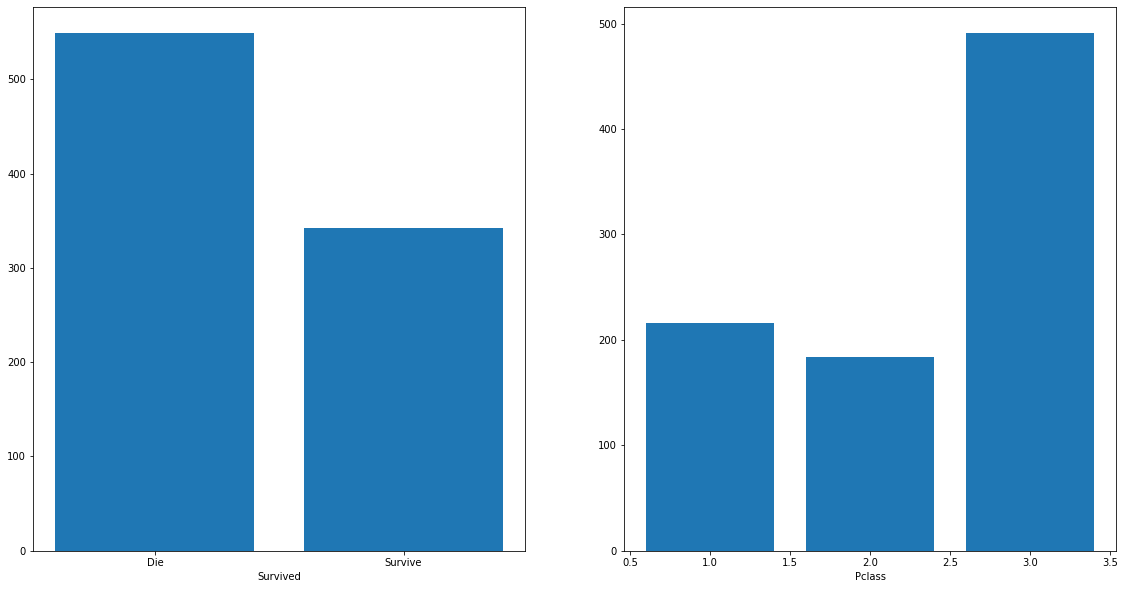

In [8]:
plt.figure(figsize=(30, 10))
grouped_survived_count_xticks = ['Die', 'Survive']
grouped_survived_count = data.loc[:, ['Survived']].groupby(by='Survived').size()
plt.subplot(131)
plt.bar(grouped_survived_count.index, grouped_survived_count)
plt.xlabel('Survived')
plt.xticks(grouped_survived_count.index, grouped_survived_count_xticks)

grouped_class_count = data.loc[:, ['Pclass']].groupby(by='Pclass').size()
plt.subplot(132)
plt.bar(grouped_class_count.index, grouped_class_count)
plt.xlabel('Pclass')

Вопросы:
1. Больше выживших или погибших?
2. В каком классе больше пассажиров?

**2.0 Подсчитайте число людей в разрезе выживаемости и пола.**

([<matplotlib.axis.XTick at 0x7fe537e15820>,
 [Text(0, 0, 'Die_female'),
  Text(1, 0, 'Die_male'),
  Text(2, 0, 'Survive_female'),
  Text(3, 0, 'Survive_male')])

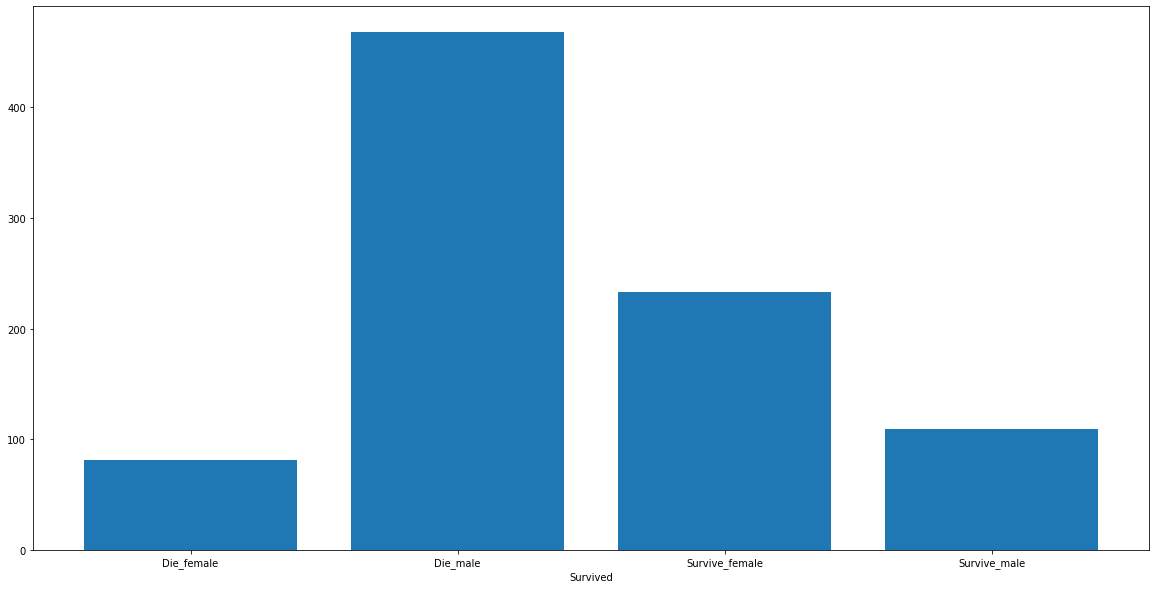

In [26]:
plt.figure(figsize=(20, 10))
data_converted_gender = data.copy()
grouped_gender_count = data_converted_gender.loc[:, ['Survived', 'Sex']].groupby(['Survived', 'Sex']).size()
grouped_gender_count = grouped_gender_count.reset_index().rename(columns={0: "Count"})
grouped_gender_count_xticks = cartesian(grouped_survived_count_xticks, grouped_gender_count['Sex'].unique())

plt.xlabel('Survived')
plt.bar(grouped_gender_count.index, grouped_gender_count['Count'])
plt.xticks(grouped_gender_count.index, grouped_gender_count_xticks)



**2.1 Постройте изображение с четырьмя подграфиками (2х2) столбцовых диаграм.**
- Доля числа пассажиров в зависимости от пола
- Число пассажиров в зависиости от их пола по разрезу выживаемости
- Число пассажиров в зависимости от их класса
- Число пассажиров в зависиости от их класса по разрезу выживаемости

([<matplotlib.axis.XTick at 0x7fe536421fd0>,
 [Text(0, 0, 'Die_1'),
  Text(1, 0, 'Die_2'),
  Text(2, 0, 'Die_3'),
  Text(3, 0, 'Survive_1'),
  Text(4, 0, 'Survive_2'),
  Text(5, 0, 'Survive_3')])

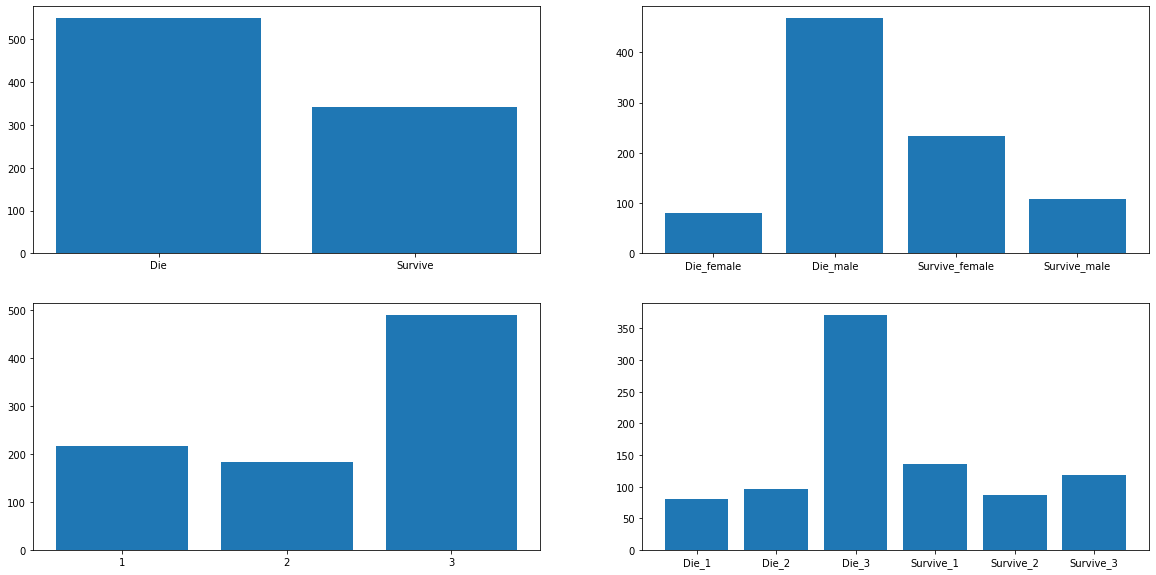

In [31]:
grouped_class_survive_count = data_converted_gender.loc[:, ['Survived', 'Pclass']].groupby(['Survived', 'Pclass']).size()
grouped_class_survive_count = grouped_class_survive_count.reset_index().rename(columns={0: "Count"})
grouped_class_survive_xticks = cartesian(grouped_survived_count_xticks, grouped_class_survive_count['Pclass'].unique())

plt.figure(figsize=(20, 10))

#Доля числа пассажиров в зависимости от пола
plt.subplot(221)
plt.bar(grouped_survived_count.index, grouped_survived_count)
plt.xticks(grouped_survived_count.index, grouped_survived_count_xticks)

#Число пассажиров в зависиости от их пола по разрезу выживаемости
plt.subplot(222)
plt.bar(grouped_gender_count.index, grouped_gender_count['Count'])
plt.xticks(grouped_gender_count.index, grouped_gender_count_xticks)

#Число пассажиров в зависимости от их класса
plt.subplot(223)
plt.bar(grouped_class_count.index, grouped_class_count)
plt.xticks(grouped_class_count.index, grouped_class_count.index)

#Число пассажиров в зависиости от их класса по разрезу выживаемости
plt.subplot(224)
plt.bar(grouped_class_survive_count.index, grouped_class_survive_count['Count'])
plt.xticks(grouped_class_survive_count.index, grouped_class_survive_xticks)


Вопросы:
1. Какой пол чаще погибает?
2. В каком классе выживших больше, чем погибших?
3. В каком классе больше всего погибших?

**3. Постройте изображение с двумя подграфиками скрипичных диаграм.**
- Возраст в зависимости от класса
- Возраст от пола 

Поставьте отсечки на шкале x от 0 до 100 с шагом 10  
Параметр split может помочь сделать граффики более наглядными

In [ ]:
# Ваш код здесь

Верно или нет?  
1. Количество детей увеличивается с Pclass, а выживаемость детей выглядит хорошей независимо от Pclass.  
2. Шансы на выживание для пассажиров в возрасте 20-50 лет из Pclass1 высоки, но хуже чем для женщин.  
3. Для мужчин шансы на выживание растут с возрастом.  

**4. Постройте изображение с двумя подграфиками гистограмм.**
- Распределение выживших по возрасту (зеленая заливка, черная обводка)
- Распределение погибших по возрасту (красная заливка, черная обводка)  
Возьмите число бинов 20

In [ ]:
# Ваш код здесь

Вопрос:
1. В какой возрастной группе самое большое отличие в числе выживших и погибших?

**5. Постройте изображение с тремя подграфиками распределения плотности.**
- Распределение тарифов в первом классе
- Распределение тарифов во втором классе
- Распределение тарифов в третьем классе

In [ ]:
# Ваш код здесь

Вопросы:
1. В каком классе распределение тарифов самое широкое?
2. В каком классе распределение тарифов имеет два пика?

**6. Постройте матрицу корреляции**

In [ ]:
# Ваш код здесь

Вопросы:
1. Какая фича имеет самую большую корреляцию с выживаемостью?
2. Какие две фичи имеют наибольшую корреляцию?